# Effect of Ranking Indicators on University Ranking (QS University Ranking 2023)

## Investigation Overview
The aim is to investigate the QS University Ranking and the impact of the six ranking indicators among Universities using the QS University Ranking 2023 as a case study.

## Dataset Overview
The Dataset consists of 1422 Universities across the globe. the dataset has 21 columns, but the emphasise is on the six ranking indicators (ar score, er score, fsr score, isr score, ifr score, cpf score), location, institution and the ranking.

In [1]:
#imports all the libraries to be used here.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette(['tab:purple','orange'])

In [2]:
#load the dataset and it's statistics
uni_df = pd.read_csv('university2023.csv')

In [3]:
#handling score scaled datatype.
uni_df['score scaled'].replace('-',np.nan, inplace=True)
uni_df['score scaled'] = uni_df['score scaled'].astype('float')

#### custom build functions

In [4]:
def plot_hist(x,df=uni_df):
    '''
    This function plot the distribution of x
    inputs:
        df: the dataframe to extract the data from
        x: the column to plot
    return:
        a histogram plot
    '''
    #plt.subplot(1,2,1)
    plt.figure(figsize=[8, 5])
    binsize = 3
    bins = np.arange(0, df[x].max()+binsize, binsize)    
    plt.hist(data = df, x = x, bins = bins)
    plt.title(f'Distribution of {x}')
    plt.xlabel(x)

In [5]:
def plot_log_hist(x,df=uni_df):
    '''
    This function plot the distribution of x
    inputs:
        df: the dataframe to extract the data from
        x: the column to plot
    return:
        a histogram plot
    '''
    #plt.subplot(1,2,1)
    plt.figure(figsize=[8, 5])
    binsize = 0.05
    max = np.log10(df[x].describe())['max']
    bins = 10 ** np.arange(0, max+binsize, binsize)    
    plt.hist(data = df, x = x, bins = bins, color='tab:purple')
    plt.title(f'Log Distribution of {x}')
    plt.xlabel(x)
    plt.xscale('log')
    plt.xticks([1,2,5,10,25,50,100],[1,2,5,10,25,50,100]);

# What are the Countries with the Most ranked Universities?
The United State (US) has the most universities ranked, with 201 Universities on the ranked list, followed by United kingdom (UK) with 90 Universities on the list, then Canada with 71 Universities and the rest.

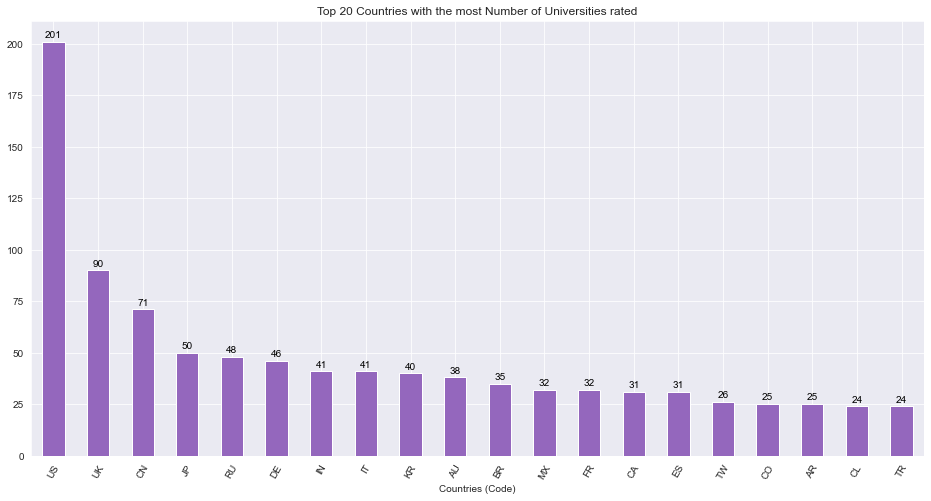

In [6]:
#plot countries with number of universities rated
plt.figure(figsize=(16,8))
code_order = uni_df['location code'].value_counts().sort_values(ascending=False)[:20]
uni_df['location code'].value_counts().sort_values(ascending=False)[:20].plot(kind='bar')
plt.title('Top 20 Countries with the most Number of Universities rated')
plt.xlabel('Countries (Code)')
#plt.ylabel('Number of University')
#get the current tick location and labels
locs, labels = plt.xticks(rotation=60)
for loc, label in zip(locs,labels):
    
    # get the text property for the label to get the correct count
    count = code_order[label.get_text()]
    
    #convert count into % e.g 109 = 109*100/n_pokemon
    pct_string = '{}'.format(count)
 
    #print on the bar
    plt.text(loc, count+2, pct_string, ha='center', color='black')

# Distribution of Academic reputation score
The academic reputation score has a value that ranges from 0-100, when plot on a logarithmic scale it has a unimodal shape, with one peak value between 4 and 5 roughly.

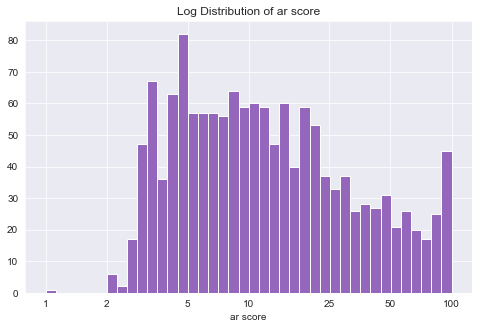

In [7]:
plot_log_hist('ar score')

# Distribution of Employment reputation score
The employment reputation score has a value that ranges from 0-100, when plot on a logarithmic scale it has a unimodal shape.

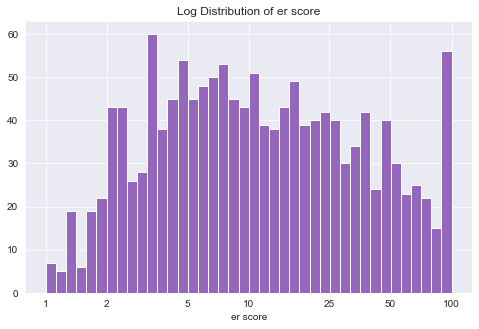

In [8]:
plot_log_hist('er score')

### ...The remaining ranking indicators are Unimodal in shape

# Employment Reputation vs Academic reputation
When plotted on a log scale there's a clear Linear relationship between academic reputation (ar score) and employment reputation(er score)  when the points are zoom in the third subplot. where we can see that a high ar score result in higher er score. we can expect high er score will result in high ar score.

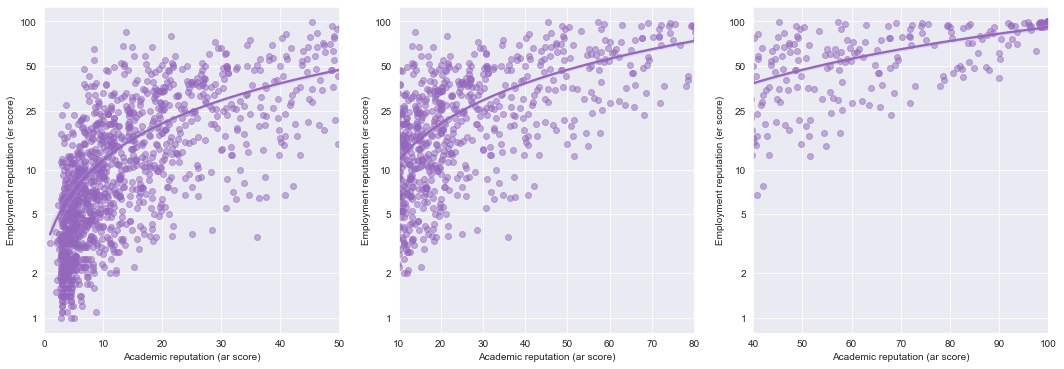

In [9]:
#applying log transformation on the y-axis and viewing it to see clear relationship between ar score and er score
plt.figure(figsize = [18, 6])
plt.subplot(1,3,1)
sns.regplot(data = uni_df, x = 'ar score', y = 'er score', scatter_kws={'alpha':1/2})
plt.xlim([0, 50])
plt.xlabel('Academic reputation (ar score)')
plt.yscale('log')
plt.yticks([1,2,5,10,25,50,100],[1,2,5,10,25,50,100]);
plt.ylabel('Employment reputation (er score)')

plt.subplot(1,3,2)
sns.regplot(data = uni_df, x = 'ar score', y = 'er score', scatter_kws={'alpha':1/2})
plt.xlim([10, 80])
plt.xlabel('Academic reputation (ar score)')
plt.yscale('log')
plt.yticks([1,2,5,10,25,50,100],[1,2,5,10,25,50,100]);
plt.ylabel('Employment reputation (er score)')

plt.subplot(1,3,3)
sns.regplot(data = uni_df, x = 'ar score', y = 'er score', scatter_kws={'alpha':1/2})
plt.xlim([40, 100])
plt.xlabel('Academic reputation (ar score)')
plt.yscale('log')
plt.yticks([1,2,5,10,25,50,100],[1,2,5,10,25,50,100]);
plt.ylabel('Employment reputation (er score)');

In [10]:
uni_df1 = uni_df[uni_df['location code'].isin(['US','UK','CN'])]

In [11]:
#relationship between locations and the six indicators.
def plot_cat_rel(x,df=uni_df1):
    '''
    This function plots a boxplot that shows the relationship between the University locations and the six ranking indicators
    inputs:
        df: the dataframe to extract the data from
        x: the column to plot
    return:
        a box plot depicting a relationship.
    '''
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.boxplot(data=uni_df1, x='location code', y=x, color='tab:purple')
    plt.xlabel('University Location')
    plt.subplot(1,2,2)
    sns.violinplot(data=uni_df1, x='location code', y=x, inner=None, color='tab:purple')
    plt.xlabel('University Location')

In [12]:
#first function for ploting 2 numeric one categorical
def plot_3d(x,y,z='location code'):
    '''
    This function plot the distribution of x and y encode with z variable
    inputs:
        x: the variable on the x axis
        y: the variable on the y axis
        z: the variable to be encode using non-positional encoding
    return:
        a scatter plot with color encoding.
    '''
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=uni_df1, x=x,y=y,hue=z,palette=['orange','tab:purple','green'])
    plt.title(f'Relationship between {x} with {y} based on {z}')
    plt.ylabel(y)
    plt.xlabel(x)
    plt.legend(title=z,title_fontsize=20,loc='center left', bbox_to_anchor=(1, 0.9)) 
 

In [13]:
#second function for ploting all numeric
def plot_3dN(x,y,z='Rank'):
    '''
    This function plot the distribution of x and y encode with z variable
    inputs:
        x: the variable on the x axis
        y: the variable on the y axis
        z: the variable to be encode using non-positional encoding
    return:
        a scatter plot with sequential color encoding.
    '''
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=uni_df1, x=x,y=y,hue=z)
    plt.title(f'Relationship between {x} with {y} based on {z}')
    plt.ylabel(y)
    plt.xlabel(x)
    plt.legend(title=z,title_fontsize=20,loc='center left', bbox_to_anchor=(1, 0.85))

# Academic reputation (ar score) and Employment reputation (er score) by location
We can see most of the points are closer to zero which shows only few universities tend to get high er score and ar score. and closer to the edge at the top, UK universities have higher er score than the other regions.

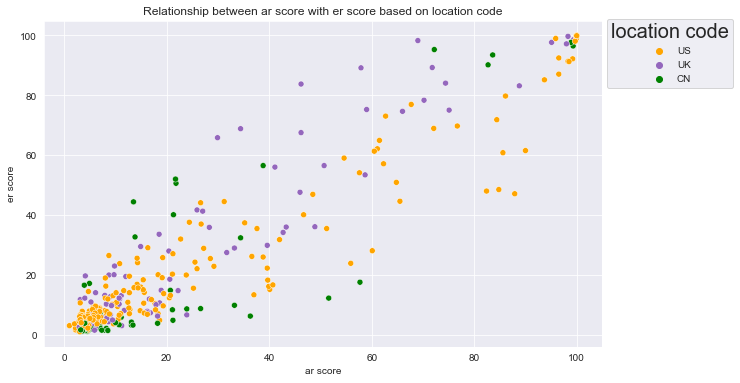

In [14]:
plot_3d('ar score','er score')

# International student ratio (isr score) and International Faculty ratio (ifr score) by Location
There's a slightly strong positive relationship between the ifr and isr score and it shows that as the ifr score is higher so also ifr is high too, whereas UK Varsities tend to have higher ifr and isr score.

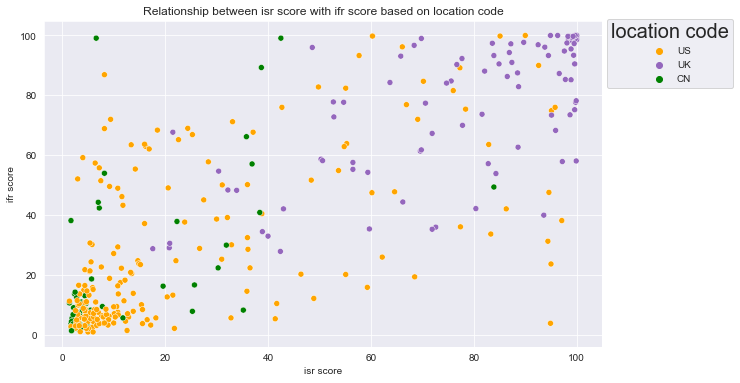

In [15]:
plot_3d('isr score','ifr score')

# International student ratio (isr score) and International Faculty ratio (ifr score) by Location
There's no strong relationship here, but we can learn that in the US, Universities moderately good ifr and er score as their points are dispered throughout the graph while in the UK, Universities score high ifrf score and lose on er score with only few Universities are able to get both high scores. In canda it lose both.

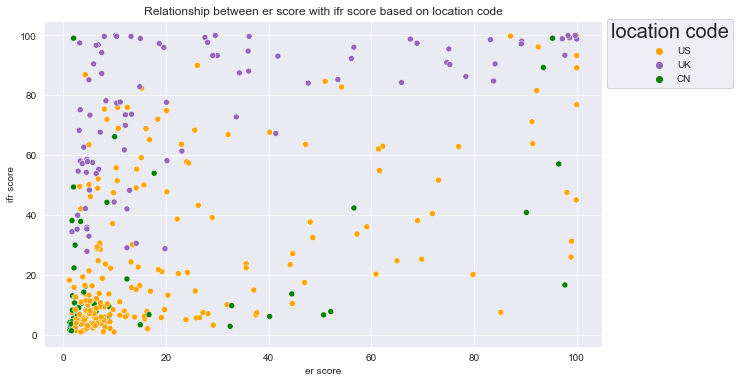

In [16]:
plot_3d('er score','ifr score')

# Academic reputation (ar score) and Employment reputation (er score) by Rank
Those Universities that tend to get good er and ar score are at the top ranks while majority of the Universities score less and they are ranked poorly.

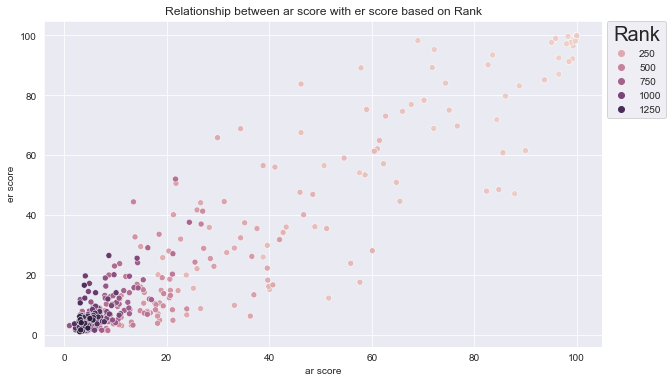

In [17]:
plot_3dN('ar score','er score','Rank')

# Thank You

In [19]:
!jupyter nbconvert QSUniversity_Ranking_Part2.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook QSUniversity_Ranking_Part2.ipynb to slides
[NbConvertApp] Writing 1037717 bytes to QSUniversity_Ranking_Part2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\d\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\d\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\d\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\d\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\d\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\